In [1]:
import numpy.random as rand
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# После 3.1 наболело, сделаю класс, чтобы легче управлять всеми этими... распределениями.

class Distribution:
    def __init__(self, values, theta, N):
        self.values = values
        self.theta = theta
        self.N = N

In [3]:
class Evaluation:
    # Здесь функция function должна по распределению считать оценку для всех n <= N
    def __init__(self, distribution, function, parameter, name=""):
        self.function = function
        self.calculate(distribution)
        self.name = name
        self.parameter = parameter

    def calculate(self, distribution):
        self.data = self.function(distribution)

    def paint(self):
        myFigure, myAxis = plt.subplots()
        myAxis.plot(self.data, label="{} for parameter = {}".format(self.name, self.parameter))
        myAxis.legend(loc="upper left")
        myAxis.set_xlabel("n")
        myAxis.set_ylim(self.parameter - self.parameter / 2, self.parameter + self.parameter / 2)
        myAxis.set_ylabel("Evaluation")
        myAxis.set_title(self.name)
        
    def paintLosses(self):
        myFigure, myAxis = plt.subplots()
        myAxis.plot(self.losses, label="losses for {}".format(self.name))
        myAxis.legend(loc="upper left")
        myAxis.set_xlabel("n")
        myAxis.set_ylim(0, self.losses.mean())
        myAxis.set_ylabel("Losses")
        myAxis.set_title("losses for {}".format(self.name))

    def calculateLosses(self):
        self.losses = np.array([(value - self.parameter) ** 2 for value in self.data])            

In [4]:
N = 10**3
M = 10**2
thetas = {1, 2, 3}

distributions = [
    Distribution(np.random.uniform(0, theta, N), theta, N)
    for theta in thetas
    for n in range(M)
]

In [5]:
def doubleAverageX(distribution):
    result = []
    for n in range(distribution.N):
        result.append(2 * distribution.values[:n].sum() / (n + 1))
    return result
doubleAverageX.name = r"$2\bar{X}$"

def nPlus1Minimum(distribution):
    return [(n + 1) * distribution.values[:n].min() for n in range(1, distribution.N + 1)]
nPlus1Minimum.name = r"$(n+1)X_{(1)}$"

def minPlusMax(distribution):
    return [distribution.values[:n].min() + distribution.values[:n].max() for n in range(1, distribution.N + 1)]
minPlusMax.name = r"$X_{(1)}+X_{(n)}$"

def nPlus1MaximumOnN(distribution):
    return [(n + 1) * distribution.values[:n].max() / n for n in range(1, distribution.N + 1)]
nPlus1MaximumOnN.name = r"$\frac{n+1}{n}X_{(n)}$"

functions = [doubleAverageX, nPlus1Minimum, minPlusMax, nPlus1MaximumOnN]

In [6]:
evaluations = [
    Evaluation(distribution, function, distribution.theta)
    for distribution in distributions
    for function in functions
]

In [7]:
for evaluation in evaluations:
    evaluation.calculateLosses()

In [8]:
def paintLosses(evaluations, parameter, function):
    losses = [np.mean(np.array([
            evaluation.losses[n] for evaluation in evaluations
            if evaluation.function == function
            if evaluation.parameter == parameter
    ])) for n in range(N)]
    myFigure, myAxis = plt.subplots()
    myAxis.plot(losses, label="Losses for {} with theta = {}".format(function.name, parameter))
    myAxis.legend(loc="upper left")
    myAxis.set_xlabel("n")
    myAxis.set_ylim(0, np.mean(losses))
    myAxis.set_ylabel("Losses")
    myAxis.set_title("Losses for {} with theta = {}".format(function.name, parameter))

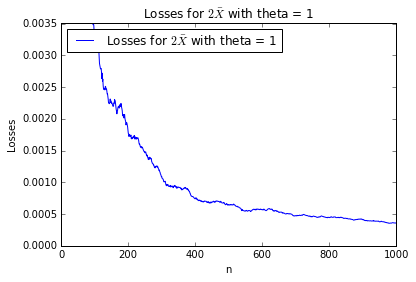

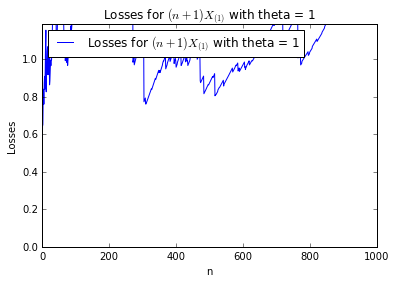

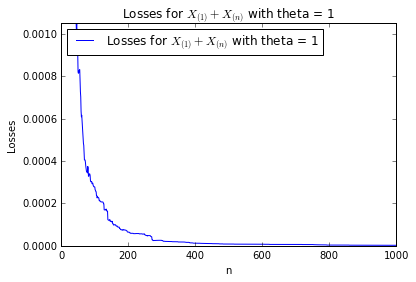

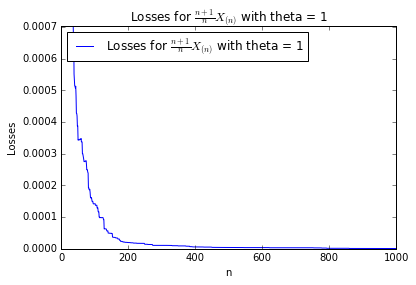

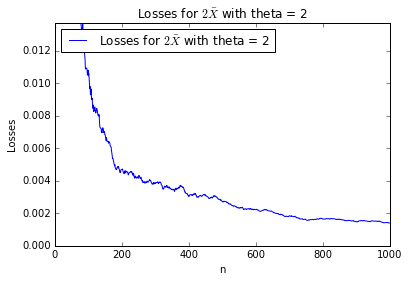

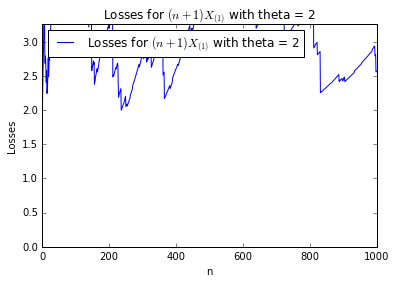

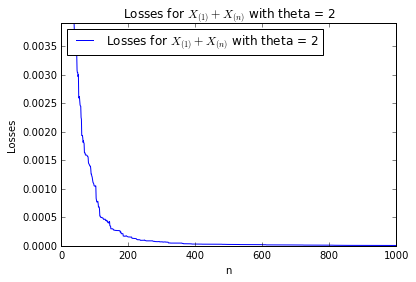

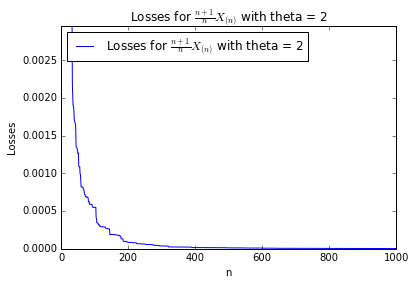

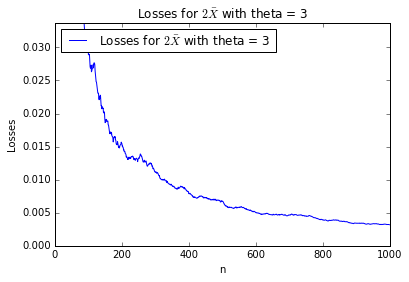

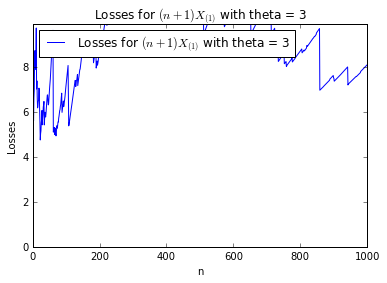

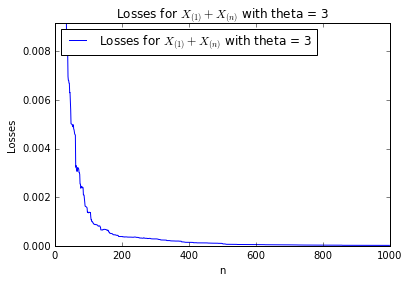

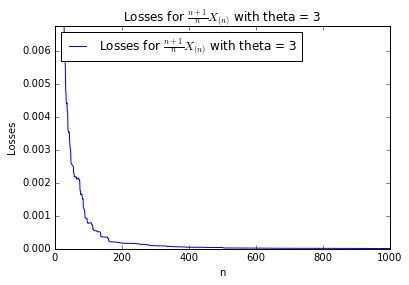

In [9]:
for theta in thetas:
    for function in functions:
        paintLosses(evaluations, theta, function)

Очивидным становятся большие потери оценки $(n+1)X_{(1)}$. Для остальных оценок потери уменьшаются с увеличением размера выборки.